In [1]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [2]:
import random
p = 0.001
cols_list = ["app_name", "author.steamid", "author.num_reviews"]
df = pd.read_csv("steam_reviews.csv")#, header = 0, skiprows = lambda i : i>0 and random.random() > p)

# RQ5

**Top 10 most popular rewievers based on the number of reviews made**

In [15]:
top10 = df.sort_values(by = "author.num_reviews", ascending = False)

In [17]:
top10[["author.steamid", "author.num_reviews"]].drop_duplicates()[:10]

,author.steamid,author.num_reviews
13093694,76561198103272004,4398046511108
5663041,76561198848008157,4398046511105
20635080,76561198125392509,5236
9573424,76561198135438892,5148
19317066,76561198116879965,4795
20506779,76561197960373660,4137
20916025,76561198057389389,3775
12646768,76561198057389389,3774
12144464,76561198057389389,3772
10053453,76561198057389389,3767


**Application reviewed by the most popular author:**

In [18]:
#looking for the most popular author based on the number of reviews done
most_popular = df[df["author.num_reviews"] == df["author.num_reviews"].max()]
#memorizing the steamid of the most popular author
author_id = int(most_popular["author.steamid"])

#games = df.loc[(df["author.steamid"] == author_id)]
games = df[df["author.steamid"] == author_id]
games

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
13093694,13093698,271590,Grand Theft Auto V,62108069,latam,wen juego alv,1579469945,1579469945,True,0,...,True,False,False,76561198103272004,40,4398046511108,17966.0,0.0,1689.0,1.608852e+09


**Applications purchased and got for free by the most popular author**

In [19]:
#purch = df[["app_name", "steam_purchase", "author.steamid"]]
purch = df[df["author.steamid"] == author_id]
count_purchase = 0
count_free = 0
total = 0

#iterate the purch DataFrame created to check if the games where purchased or not
for index, row in purch.iterrows():
    if(row["steam_purchase"]):
        count_purchase += 1
    if(row["received_for_free"]):
        count_free += 1
    total += 1

#using the total number of games, i will calculate the percentage for the values
perc_purch = (count_purchase/total)*100
perc_free = (count_free/total)*100

print("The number of games PURCHASED by the most popular author is:\t", str(count_purchase),"[in percentage:", round(perc_purch, 2),"%]"
      "\nInstead, the number of games he RECEIVED FOR FREE is:\t\t", str(count_free), "[in percentage:", round(perc_free, 2),"%]")

The number of games PURCHASED by the most popular author is:	 1 [in percentage: 100.0 %]
Instead, the number of games he RECEIVED FOR FREE is:		 0 [in percentage: 0.0 %]


**Number of positive and negatives reviews for both games purchased and got for free**

In [23]:
#using the iterator as in the last cell, we will check and count every review and store the results in different variables
p_purch = 0
n_purch = 0
tot_purch = 0

p_free = 0
n_free = 0
tot_free = 0

for index, row in purch.iterrows():
    if(row["steam_purchase"]):
        if(row["recommended"]): p_purch += 1
        else: n_purch += 1
        tot_purch += 1
    if(row["received_for_free"]):
        if(row["recommended"]): p_free += 1
        else: n_free += 1
        tot_free += 1

if tot_purch == 0: tot_purch = 0
perc_purch_p = (p_purch/tot_purch)*100
perc_purch_n = (n_purch/tot_purch)*100

if tot_free == 0: tot_free = 1
perc_free_p = (p_free/tot_free)*100
perc_free_n = (n_free/tot_free)*100

print("PURCHASED:","\n\tThe number of POSITIVE (recommended) games is:\t\t", str(p_purch), "[in percentage:", round(perc_purch_p, 2) ,"%]"
     "\n\tThe number of NEGATIVE (not recommended) games is:\t", str(n_purch), "[in percentage:", round(perc_purch_n, 2) ,"%]")
print("\nRECEIVED FOR FREE:","\n\tThe number of POSITIVE (recommended) games is:\t\t", str(p_free), "[in percentage:", round(perc_free_p, 2) ,"%]",
     "\n\tThe number of NEGATIVE (not recommended) games is:\t", str(n_free), "[in percentage:", round(perc_free_n, 2) ,"%]")

PURCHASED: 
	The number of POSITIVE (recommended) games is:		 1 [in percentage: 100.0 %]
	The number of NEGATIVE (not recommended) games is:	 0 [in percentage: 0.0 %]

RECEIVED FOR FREE: 
	The number of POSITIVE (recommended) games is:		 0 [in percentage: 0.0 %] 
	The number of NEGATIVE (not recommended) games is:	 0 [in percentage: 0.0 %]


# RQ6

**Average time a user lets pass before updating a review**

In [24]:
from datetime import datetime as dt
import time

created_timestamp = [x for x in df.timestamp_created if not pd.isnull(x)]

updated_timestamp = [x for x in df.timestamp_updated if not pd.isnull(x)]

In [30]:
comb = zip(created_timestamp, updated_timestamp)
diff = []

for c, u in comb:
    if (c != u):
        diff.append(u-c)

In [31]:
mean = 0
for i in diff:
    mean += i
mean = mean//len(diff)
day = mean // (24 * 3600)
mean = mean % (24 * 3600)
hour = mean // 3600
mean %= 3600
minute = mean // 60
minute += hour*60

print("The average time a user lets pass before updating a review is:", day, "days and", minute, "minutes")

The average time a user lets pass before updating a review is: 321 days and 46 minutes


**Top 3 authors that usually update their reviews**

In [27]:
up = df[df["timestamp_created"] != df["timestamp_updated"]]

In [28]:
#The authors with most updated reviews, and the number of times they updated a review
out = up["author.steamid"].value_counts()[0:3]
out

76561198192166873    95
76561198206999976    61
76561198072450805    60
Name: author.steamid, dtype: int64

Text(0, 0.5, '# of updated reviews')

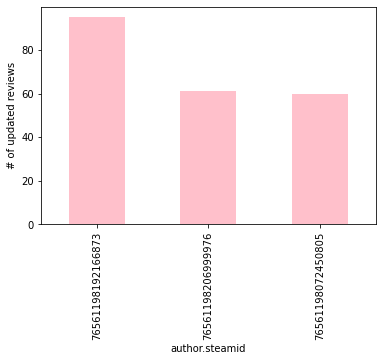

In [29]:
#plot the result
out.plot.bar(color = "PINK")
plt.xlabel("author.steamid")
plt.ylabel("# of updated reviews")

# TQ3

In the knapsack problem we are given n objects and each object i has a **weight w_i** and a **value v_i**. We are also given a weight budget W. The problem is to select a set of objects with total weight bounded by W that maximized the sum of their values.

Given these heuristics:
    
    -Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the
    budget is not exceeded
    
    -Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget
    is not exceeded

    -Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if
    the budget is not exceeded

The goal is to provide for each of these heuristics a counterexample, showing that the solution given is not the optimal one.


We used the same table for the first 2 points and a new one for the last.
We chose to use $n = 7$ elements so that the solution will not be too trivial.

##### 1. Increasing order of weight

Given the table:

| Weight | Value | 
| :- | -: |
| 1 | 2 |
| 2 | 3 |
| 3 | 1 |
| 3 | 2 |
| 3 | 5 |
| 4 | 4 |
| 5 | 3 |

Aready ordered in increasing order of weight, we see that:
$$W_{1} = 1 + 2 + 3 + 3 = 9 < W_{max}$$
$$V_{1} = 2 + 3 + 1 + 2 = 8 < V_{opt}$$
Where:
$$W_{opt} = 3 + 1 + 2 + 4 = 10 = W_{max}$$
$$V_{opt} = 5 + 2 + 3 + 4 = 14$$

The example show that this method doesn't give the optimal solution.

(Maybe there are other cases better than this, but this is enough to demonstrate that the heuristic doesn't provide the optimal solution)

##### 2. Decreasing order of value

Using the same table of point 1, but ordered properly, we have:

| Weight | Value | 
| :- | -: |
| 3 | 5 |
| 4 | 4 |
| 5 | 3 |
| 2 | 3 |
| 3 | 2 |
| 1 | 2 |
| 3 | 1 |

Keep in consideration that $V_{opt}$ and $W_{opt}$ are the same as before.

Following the heuristic, the solution is:
$$W_{2} = 3 + 4 = 7 < W_{max}$$
$$V_{2} = 5 + 4 = 9 < V_{opt}$$
Again we shown that this is not the optimal solution for this case.

##### 3. Decreasing order of $v_{i}/w_{i}$

Here we have to compute: $$ x_{i} = v_{i} / w_{i}$$
and order the value in the table based on their decreasing order.

Let's calulate the values and build the table:
$$ x_{1} = 5 / 4 = 1.25$$
$$ x_{2} = 3 / 5 = 0.6$$
$$ x_{3} = 3 / 2 = 1.5$$
$$ x_{4} = 2 / 1 = 2$$
$$ x_{5} = 3 / 4 = 0.75$$
$$ x_{6} = 2 / 4 = 0.5$$
$$ x_{7} = 1 / 3 = 0.33$$

As we can see the order is: $$ x_{4}, x_{3}, x_{1}, x_{5}, x_{2}, x_{6}, x_{7} $$


So the table will be:

| Weight | Value | 
| :- | -: |
| 1 | 2 |
| 2 | 3 |
| 4 | 5 |
| 4 | 3 |
| 5 | 3 |
| 4 | 2 |
| 3 | 1 |

Here we see that one of the possible optimal solution is given by: 
$$W_{opt} = 1 + 4 + 2 + 3 = 10 = W_{max} $$
$$V_{opt} = 2 + 5 + 3 + 1 = 11$$
Instead, following the heuristic:
$$W_{3} = 1 + 2 + 4 = 7 < W_{max}$$
$$V_{3} = 2 + 3 + 5 = 10 < V_{opt}$$

We can say that this is a valid counterexample.